In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv', low_memory=False)

In [3]:
#Bus_Breakdown

In [4]:
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}:{port}/?charset=utf8'.format(
    user='root', password='dwdstudent2015', 
    host = 'localhost', port=3306, encoding='utf-8')
engine = create_engine(conn_string)

In [5]:
engine.execute('CREATE DATABASE IF NOT EXISTS BusBreakdown')
engine.execute('USE BusBreakdown')

/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:470: Warning: (1007, "Can't create database 'BusBreakdown'; database exists")
  cursor.execute(statement, parameters)


In [6]:
# Store the dataframe as a SQL table, using the to_sql command
df.to_sql(name='busbreakdown', if_exists='replace', index=False, con=engine, chunksize=1000)

AttributeError: 'NoneType' object has no attribute 'replace'

In [7]:
df2 = pd.read_sql("SELECT * FROM busbreakdown LIMIT 100", con=engine)
df2.head(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,None,11,Yes,No,Yes,11/05/2015 08:12:00 AM,None,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,None,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,None,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,None,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,None,6,No,No,No,11/05/2015 08:14:00 AM,None,11/05/2015 08:14:08 AM,Running Late,School-Age


SELECT Bus_No,          COUNT(Busbreakdown_ID) AS Num_Breakdowns          FROM busbreakdown          WHERE Reason = "Mechanical Problem" AND School_Year = "2016-2017"         GROUP BY Bus_No          ORDER BY Num_Breakdowns DESC


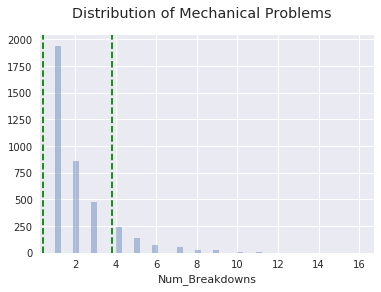

In [84]:
query = 'SELECT Bus_No, \
         COUNT(Busbreakdown_ID) AS Num_Breakdowns \
         FROM busbreakdown \
         WHERE Reason = "Mechanical Problem" AND School_Year = "2016-2017"\
         GROUP BY Bus_No \
         ORDER BY Num_Breakdowns DESC'
        

print(query)

df_bus = pd.read_sql(query, con=engine)

avg_mech_problems = np.mean(df_bus["Num_Breakdowns"])
stdev_mech_problems = np.std(df_bus["Num_Breakdowns"])


fig = plt.figure()
sns.distplot(df_bus["Num_Breakdowns"], kde = False)
plt.axvline(x = avg_mech_problems + stdev_mech_problems, color = 'green', linestyle = 'dashed')
plt.axvline(x = avg_mech_problems - stdev_mech_problems, color = 'green', linestyle = 'dashed')
fig.suptitle("Distribution of Mechanical Problems")


In [85]:
df_bus["Num_StDevs_Away_From_Mean"] = (df_bus["Num_Breakdowns"] - avg_mech_problems) / stdev_mech_problems
df_bus.head()

,Bus_No,Num_Breakdowns,Num_StDevs_Away_From_Mean
0,4128,16,8.158571
1,4104,15,7.570159
2,1453D,14,6.981747
3,900,13,6.393335
4,5524D,13,6.393335
